# Naive Bayes Algorithms

In [321]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import *
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree
from imblearn.metrics import specificity_score

In [322]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
print(df.shape)
df.head()

(891, 3)


,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [323]:
df = df.drop(['package_name'], axis=1)
df.head()

,review,polarity
0,privacy at least put some option appear offli...,0
1,"messenger issues ever since the last update, ...",0
2,profile any time my wife or anybody has more ...,0
3,the new features suck for those of us who don...,0
4,forced reload on uploading pic on replying co...,0


In [324]:
X_train, X_test, y_train, y_test = tts(df["review"], df['polarity'], test_size=0.2, random_state=42)

In [325]:
# Vectorizo en primera medida para un Naive Bayes de tipo Multinomial
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train) # construye un catalogo de las palabras q aparecen en X_train asignando a cada palabra un índice unico
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23060 stored elements and shape (712, 3553)>

In [326]:
print(X_train_vec.toarray) # para convertir la 'sparse row matrix' a matriz densa
X_train_vec.toarray()

<bound method _cs_matrix.toarray of <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 23060 stored elements and shape (712, 3553)>>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [327]:
X_train_vec.toarray()==1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [328]:
X_train_vec[X_train_vec.toarray()>=1]

matrix([[1, 2, 1, ..., 1, 1, 2]], dtype=int64)

### Since we have more values than just 0 and 1, we should work with Naive Bayes Multinomial Algorithm. 

In [329]:
# Replico el trabajo sobre los datos de test. 
X_test_vec = vectorizer.transform(X_test)
X_test_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5254 stored elements and shape (179, 3553)>

In [330]:
vectorizer.get_feature_names_out()

array(['000', '04', '0x', ..., 'žŕ', 'žŕľ', 'ˇŕ'], dtype=object)

In [331]:
list(vectorizer.get_feature_names_out())

['000',
 '04',
 '0x',
 '10',
 '100',
 '101',
 '11',
 '113mb',
 '1186',
 '12',
 '125',
 '13',
 '14',
 '14th',
 '15',
 '15mb',
 '16',
 '17',
 '180k',
 '1990s',
 '1lac',
 '1st',
 '20',
 '200',
 '2014',
 '2015',
 '2016',
 '2036',
 '22mb',
 '23',
 '24',
 '25',
 '2d',
 '2g',
 '2gb',
 '2lac',
 '2m',
 '2nd',
 '30',
 '30mins',
 '367',
 '3g',
 '3h',
 '3rd',
 '3s',
 '40',
 '40mb',
 '45mb',
 '48',
 '48gb',
 '4g',
 '4m',
 '50',
 '500',
 '500k',
 '505',
 '512kbps',
 '5star',
 '60',
 '6mb',
 '6p',
 '82',
 '826',
 '86',
 '90',
 '95',
 '98649',
 'aa',
 'aafnaii',
 'aakhirat',
 'aap',
 'aaps',
 'aapsssssss',
 'aaru',
 'ability',
 'abke',
 'able',
 'about',
 'above',
 'absolute',
 'absolutely',
 'absurdly',
 'accecesible',
 'accepted',
 'acces',
 'accesible',
 'access',
 'accessed',
 'accessible',
 'accident',
 'accidently',
 'accomplish',
 'according',
 'accordion',
 'account',
 'accounts',
 'accumulated',
 'accurate',
 'achievement',
 'achievements',
 'achive',
 'across',
 'act',
 'action',
 'active',


In [332]:
for i, val in enumerate(X_test_vec.toarray()[1]):
  if val!=0:
    print(val, vectorizer.get_feature_names_out()[i])

1 all
1 app
1 away
1 basically
1 family
1 friends
1 gone
1 has
1 helps
1 in
1 keep
1 live
1 messenger
1 my
1 now
1 over
1 really
1 that
1 the
2 this
1 touch
1 us
1 use
1 whatsapp
1 world


In [333]:
X_test.index

Index([709, 439, 840, 720,  39, 290, 300, 333, 208, 136,
       ...
       363,  97, 417, 572, 852, 433, 773,  25,  84,  10],
      dtype='int64', length=179)

In [334]:
X_test[709]

" love/hate has bug and security issues. i tried to report that facebook and google plus have security issues and it wouldn't allow me to do so! well i just did didn't i! ......"

In [335]:
X_test = X_test.reset_index(drop=True)

In [336]:
X_test[0]

" love/hate has bug and security issues. i tried to report that facebook and google plus have security issues and it wouldn't allow me to do so! well i just did didn't i! ......"

In [337]:
# Comienzo a utilizar el algoritmo indicado previamente
clf_multi = MultinomialNB().fit(X_train_vec, y_train)
y_pred_multi = clf_multi.predict(X_test_vec)

In [338]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       126
           1       0.84      0.58      0.69        53

    accuracy                           0.84       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.84      0.84      0.83       179



### Since we already have the metrics for the Multinomial algorithm, we'll now compare them with the other algorithms as requested. 
Honestly, it doesn’t make sense to use this multinomial data with a binary algorithm like Bernoulli or with an algorithm designed \
for continuous variables like Gaussian.

In [339]:
# Vectorizamos para el BernoulliNB
vectorizer_b = CountVectorizer(binary=True)
X_train_vec_b = vectorizer_b.fit_transform(X_train)

In [340]:
X_test_vec_b = vectorizer.transform(X_test)

In [341]:
# uso el algo de Bernoulli Naive Bayes
clf_b = BernoulliNB().fit(X_train_vec_b, y_train)
y_pred_bernoulli = clf_b.predict(X_test_vec_b)

In [342]:
print(classification_report(y_test, y_pred_bernoulli))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179



In [343]:


# Vectorizo con el TF-IDF para frec de ocurrencia y poder usar texto en Gaussian NB
vectorizer_gnb = TfidfVectorizer()
X_train_vec_gnb = vectorizer_gnb.fit_transform(X_train).toarray()
X_test_vec_gnb = vectorizer_gnb.transform(X_test).toarray()

# Ahora replico con el GaussianNB
clf_gnb = GaussianNB().fit(X_train_vec_gnb, y_train)
y_pred_gnb = clf_b.predict(X_test_vec_gnb)

In [344]:
print(f''' MultinomialNB: 
      {classification_report(y_test, y_pred_multi)}''')
print(f''' BernoulliNB: 
      {classification_report(y_test, y_pred_bernoulli)}''')
print(f''' GaussianNB:
      {classification_report(y_test, y_pred_gnb)}''')

 MultinomialNB: 
                    precision    recall  f1-score   support

           0       0.85      0.95      0.90       126
           1       0.84      0.58      0.69        53

    accuracy                           0.84       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.84      0.84      0.83       179

 BernoulliNB: 
                    precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.85      0.85      0.84       179

 GaussianNB:
                    precision    recall  f1-score   support

           0       0.86      0.94      0.90       126
           1       0.81      0.64      0.72        53

    accuracy                           0.85       179
   macro avg       0.84      0.79      0.81       179
weighted av

The three Naive Bayes models (MultinomialNB, BernoulliNB, and GaussianNB) show similar performance metrics, indicating that the dataset is probably suited for classification by any of these models. The results for the majority class and consistent overall accuracy suggest that the models are  capturing the dataset's key features.

### Model Optimization

In [345]:
# Genero dos modelos de random forest de clasificacion, uno simple y otro complejo y les paso los datos de entrenamiento
simple_rf = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20)
complex_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1)

simple_rf.fit(X_train_vec, y_train)
complex_rf.fit(X_train_vec, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [346]:
# Realizo las predicciones y visualizo 
y_simplerf_pred_train = simple_rf.predict(X_train_vec)
y_simplerf_pred_test = simple_rf.predict(X_test_vec)
print(y_simplerf_pred_test)

y_complexrf_pred_train = complex_rf.predict(X_train_vec)
y_complexrf_pred_test = complex_rf.predict(X_test_vec)
y_simplerf_pred_test

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

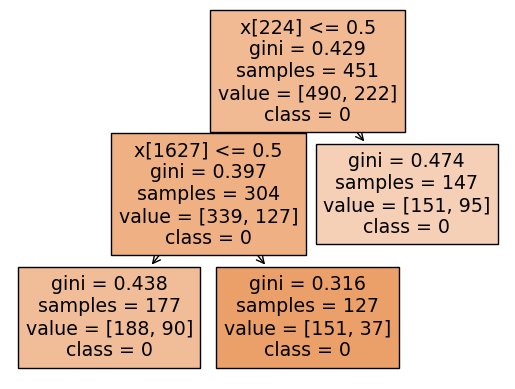

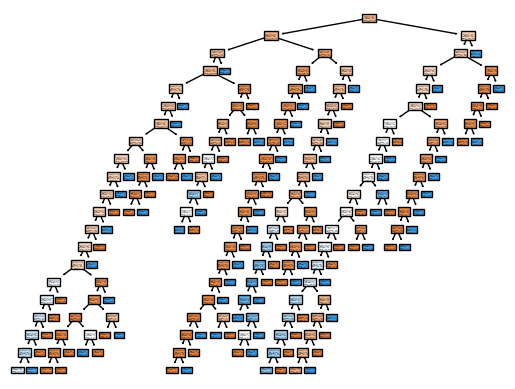

In [347]:
tree.plot_tree(simple_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()

tree.plot_tree(complex_rf.estimators_[0], class_names = ["0", "1", "2"], filled = True)
plt.show()

In [348]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)
    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)
    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity
    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])
    return metrics_df


In [351]:
metrics_rf_simp = get_metrics(y_train, y_test, y_simplerf_pred_train, y_simplerf_pred_test)
metrics_rf_comp = get_metrics(y_train, y_test, y_complexrf_pred_train, y_complexrf_pred_test)
titles = ['metrics_rf_simp','metrics_rf_comp']
metrics_compared = pd.concat([metrics_rf_simp,metrics_rf_comp], axis=0, keys=titles)
metrics_compared

c:\Users\Agustín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agustín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy        F1       AUC  Precision    Recall  \
metrics_rf_simp Train       0.643258  0.000000  0.500000   0.000000  0.000000   
                Test        0.703911  0.000000  0.500000   0.000000  0.000000   
                Diferencia -0.060652  0.000000  0.000000   0.000000  0.000000   
metrics_rf_comp Train       0.980337  0.971774  0.973318   0.995868  0.948819   
                Test        0.854749  0.682927  0.760183   0.965517  0.528302   
                Diferencia  0.125588  0.288847  0.213135   0.030351  0.420517   

                            Specificity  
metrics_rf_simp Train          1.000000  
                Test           1.000000  
                Diferencia     0.000000  
metrics_rf_comp Train          0.997817  
                Test           0.992063  
                Diferencia     0.005753

In [365]:
# Pruebo con un RF intermedio:
midcomp_rf = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_leaf=8,max_depth=20)
midcomp_rf.fit(X_train_vec, y_train)

y_midcomp_rf_pred_train = midcomp_rf.predict(X_train_vec)
y_midcomp_rf_pred_test = midcomp_rf.predict(X_test_vec)


metrics_rf_simp = get_metrics(y_train, y_test, y_simplerf_pred_train, y_simplerf_pred_test)
metrics_midcomp_rf = get_metrics(y_train, y_test, y_midcomp_rf_pred_train, y_midcomp_rf_pred_test)
metrics_rf_comp = get_metrics(y_train, y_test, y_complexrf_pred_train, y_complexrf_pred_test)
titles = ['metrics_rf_simp','metrics_midcomp_rf','metrics_rf_comp']
metrics_compared = pd.concat([metrics_rf_simp,metrics_midcomp_rf,metrics_rf_comp], axis=0, keys=titles)
metrics_compared

c:\Users\Agustín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Agustín\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy        F1       AUC  Precision  \
metrics_rf_simp    Train       0.643258  0.000000  0.500000   0.000000   
                   Test        0.703911  0.000000  0.500000   0.000000   
                   Diferencia -0.060652  0.000000  0.000000   0.000000   
metrics_midcomp_rf Train       0.714888  0.338762  0.601271   0.981132   
                   Test        0.737430  0.203390  0.556604   1.000000   
                   Diferencia -0.022543  0.135372  0.044667  -0.018868   
metrics_rf_comp    Train       0.980337  0.971774  0.973318   0.995868   
                   Test        0.854749  0.682927  0.760183   0.965517   
                   Diferencia  0.125588  0.288847  0.213135   0.030351   

                                 Recall  Specificity  
metrics_rf_simp    Train       0.000000     1.000000  
                   Test        0.000000     1.000000  
                   Diferencia  0.000000     0.000000  
metrics_midcomp_rf Train       0.204724     0.997817  
                   Test        0.113208     1.000000  
                   Diferencia  0.091517    -0.002183  
metrics_rf_comp    Train       0.948819     0.997817  
                   Test        0.528302     0.992063  
                   Diferencia  0.420517     0.005753